# お勉強
[text](https://www.amazon.co.jp/New-Kind-Science-Stephen-Wolfram/dp/1579550088/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=3K82IJMOC9D5C&keywords=new+kind+of+science&qid=1578538098&sprefix=new+kind+of+s%2Caps%2C227&sr=8-1)の8章の勉強

# 1D-CA
[貝の模様](https://ja.wikipedia.org/wiki/%E3%82%A4%E3%83%A2%E3%82%AC%E3%82%A4)と似ている。

In [15]:
def init_state(init_type, space_size):
    if init_type == 1:
        # 中央の１ピクセルのみ１、後は０
        state = np.zeros(space_size, dtype=np.int8)
        state[space_size // 2] = 1
    elif init_type == 2:
        np.random.seed(0)
        state = np.random.randint(2, size=space_size)
    next_state = np.empty(space_size, dtype=np.int8)
    return state, next_state


def exec_ca1d(rule, space_size=600, init_type=1, step_size=1000):
    state, next_state = init_state(init_type, space_size)

    results = []
    for _ in range(step_size):
        for i in range(space_size):
            l = state[i - 1]
            c = state[i]
            r = state[(i+1) % space_size]

            neighbor_cell_code = 2**2 * l + 2**1 * c + 2**0 * r
            if (rule >> neighbor_cell_code) & 1:
                next_state[i] = 1
            else:
                next_state[i] = 0
        state = next_state.copy()
        results.append(1 - state)
    return np.array(results)

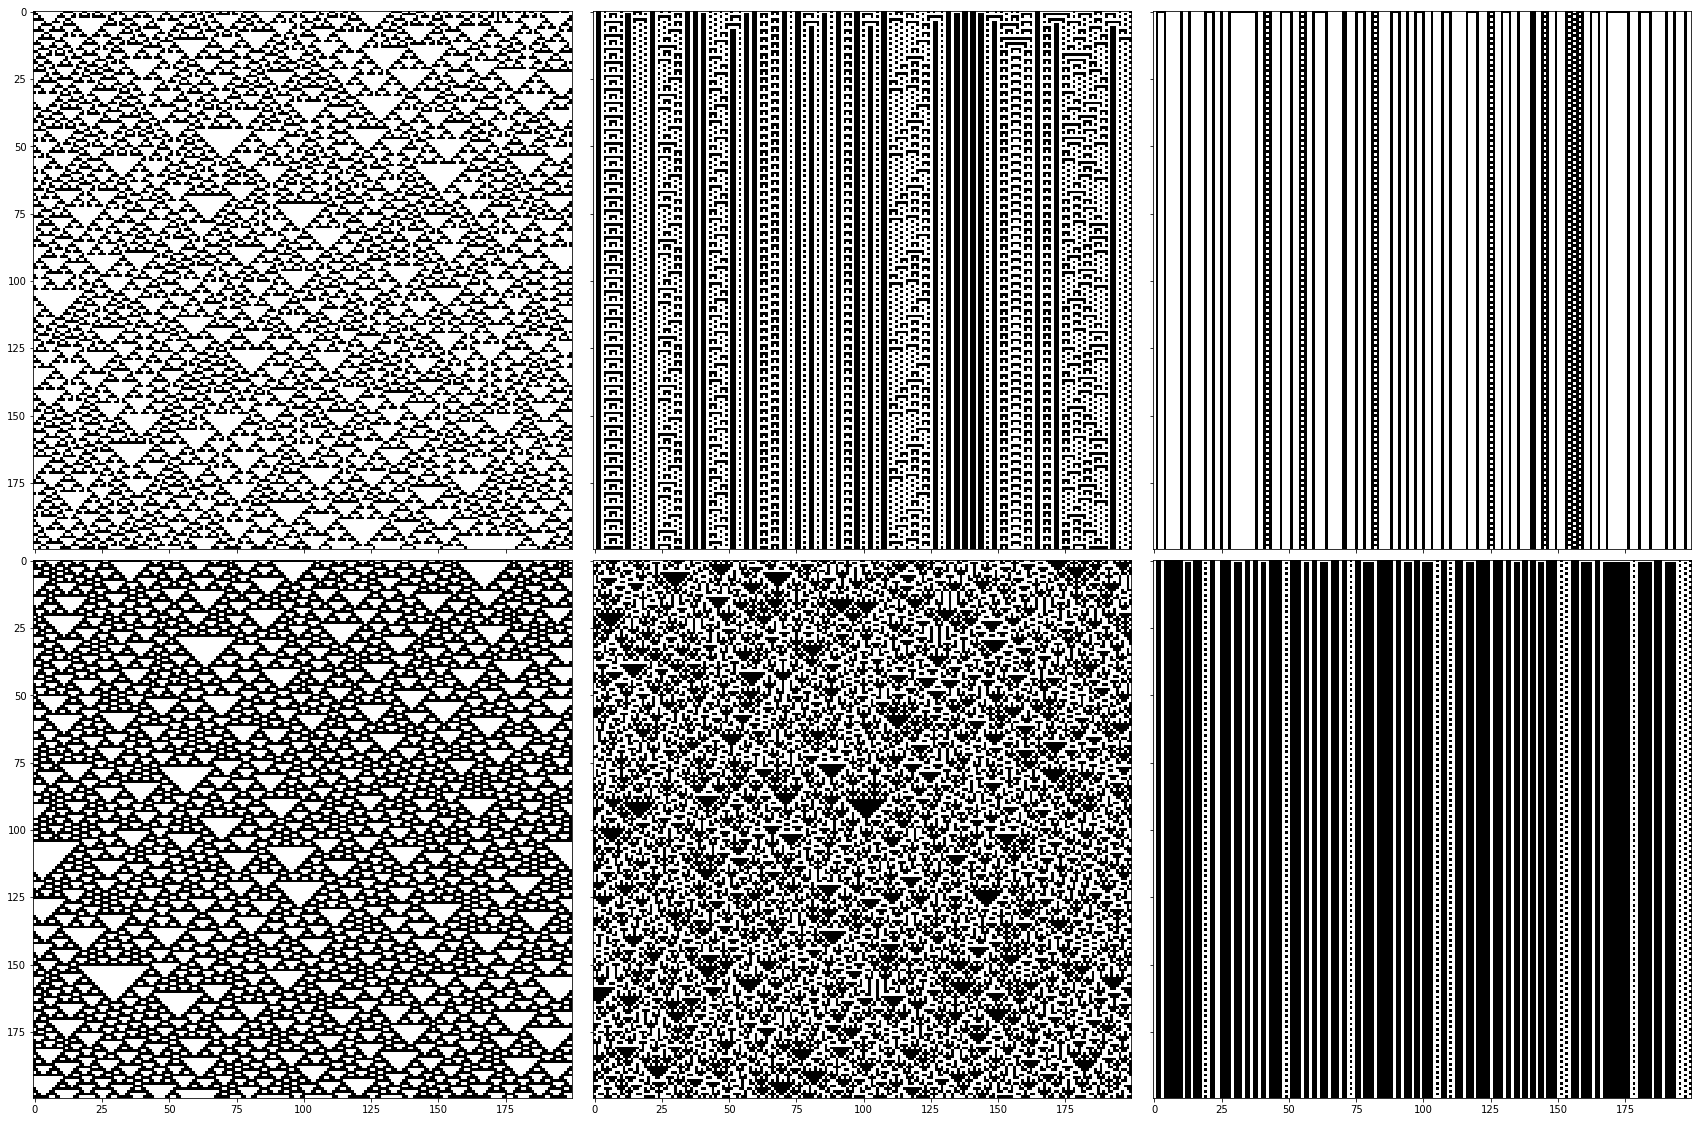

In [31]:
space_size = 200
step_size = 200
init_type = 2
rule_name = 'mullosc'
fn_figure = './figures/fig_ca1d.png'

dic_rules = dict(
    mullosc=[22, 73, 108, 126, 165, 201],
    class1=[40, 232],
    class2=[94, 108],
    class3=[30, 54, 90],
    class4=[110, 121])

fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
axes = axes.flatten()
for i, rule in enumerate(dic_rules[rule_name]):
    ax = axes[i]
    results = exec_ca1d(rule, space_size, init_type, step_size)
    ax.imshow(results, cmap='gray')
#     break

plt.savefig(fn_figure)

# 2D-CA
動物の模様と似ている。
- [チーター](https://ja.wikipedia.org/wiki/%E3%83%81%E3%83%BC%E3%82%BF%E3%83%BC)
- [キリン](https://ja.wikipedia.org/wiki/%E3%82%AD%E3%83%AA%E3%83%B3)

In [38]:
def init_state(init_type, height, width):
    if init_type == 1:
        # 中央の１ピクセルのみ１、後は０
        state = np.zeros((height, width), dtype=np.int8)
        state[height // 2, width // 2] = 1
    elif init_type == 2:
        np.random.seed(0)
        state = np.random.randint(2, size=(height, width))
    return state


def _get_circular_matrix(state, height, width, weights):
    offset = len(weights) - 1
    height2 = height + 2 * offset
    width2 = width + 2 * offset

    circ_state = np.zeros((height2, width2), dtype=np.int8)
    circ_state[offset:-offset, offset:-offset] = state
    circ_state[:offset, offset:-offset] = state[-offset:]
    circ_state[-offset:, offset:-offset] = state[:offset]
    circ_state[offset:-offset, :offset] = state[:, -offset:]
    circ_state[offset:-offset, -offset:] = state[:, :offset]
    return circ_state, offset


def update_state(state, weights):
    height, width = state.shape
    next_state = state.copy()
    circ_state, offset = _get_circular_matrix(state, height, width, weights)
    
    for i in range(height):
        for j in range(width):
            neighbor_cell_sum = 0
            sum_core = 0
            for k in range(len(weights)):
                h1 = i - k + offset
                h2 = i + k + 1 + offset
                w1 = j - k + offset
                w2 = j + k + 1 + offset
                sum_all = np.sum(circ_state[h1:h2, w1:w2])
                neighbor_cell_sum += weights[k] * (sum_all - sum_core)
                sum_core = sum_all

            if neighbor_cell_sum > 0:
                next_state[i, j] = 1
            elif neighbor_cell_sum < 0:
                next_state[i, j] = 0
            else:
                pass
    return next_state


def exec_ca2d(weights, height, width, init_type=1, step_size=100):
    state = init_state(init_type, height, width)
    for i in range(step_size):
        state = update_state(state, weights)
    return 1 - state

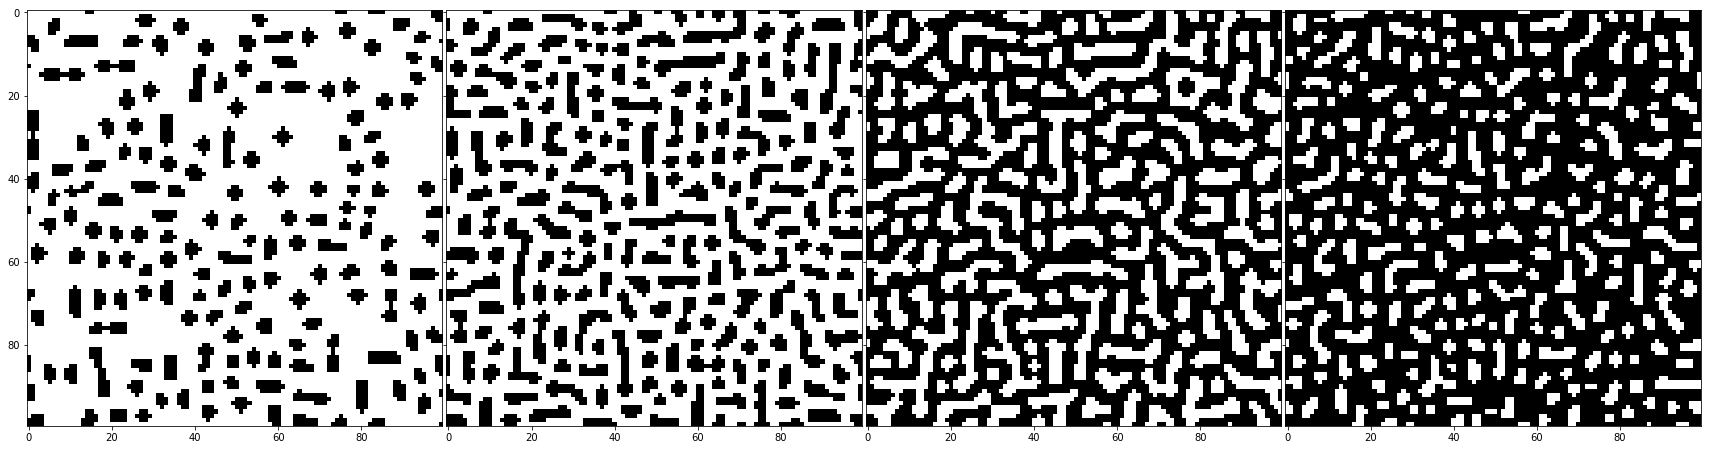

In [42]:
weights_list = [[1., 1., -0.4, -0.4],
                           [1., 1., -0.3, -0.3],
                           [1., 1., -0.2, -0.2],
                           [1., 1., -0.3, -0.1]]
height, width = 100, 100
step_size = 10
init_type = 2
fn_figure = './figures/fig_ca2d.png'

fig, axes = plt.subplots(1, 4, figsize=(30, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
axes = axes.flatten()

for i, weights in enumerate(weights_list):
    ax = axes[i]
    results = exec_ca2d(weights, height, width, init_type, step_size)
    ax.imshow(results, cmap='gray')
#     break

plt.savefig(fn_figure)

# Financial System1
テキスト通りにやったが、うまくいかず。。

In [102]:
def init_state(init_type, space_size):
    if init_type == 1:
        # 中央の１ピクセルのみ１、後は０
        state = np.zeros(space_size, dtype=np.int8)
        state[space_size // 2] = 1
    elif init_type == 2:
        np.random.seed(1)
        state = np.random.randint(2, size=space_size)
        state = np.array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])
    next_state = np.empty(space_size, dtype=np.int8)
    return state, next_state


def exec_fs(space_size=600, init_type=1, step_size=1000):
    state, next_state = init_state(init_type, space_size)

    results = []
    for _ in range(step_size):
        for i in range(space_size):
            l = state[i - 1]
            r = state[(i+1) % space_size]

            if (l + r) == 1:
                next_state[i] = 1
            else:
                next_state[i] = 0
        state = next_state.copy()
        results.append(1 - state)
    return np.array(results)

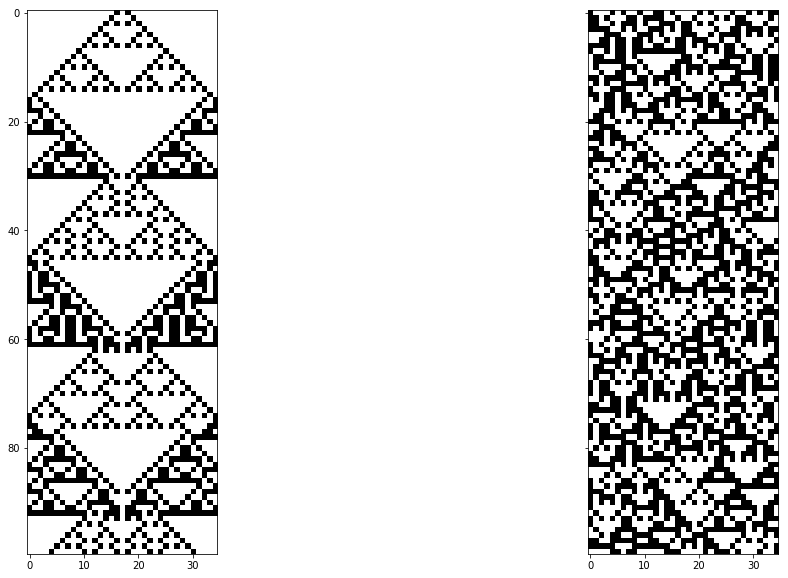

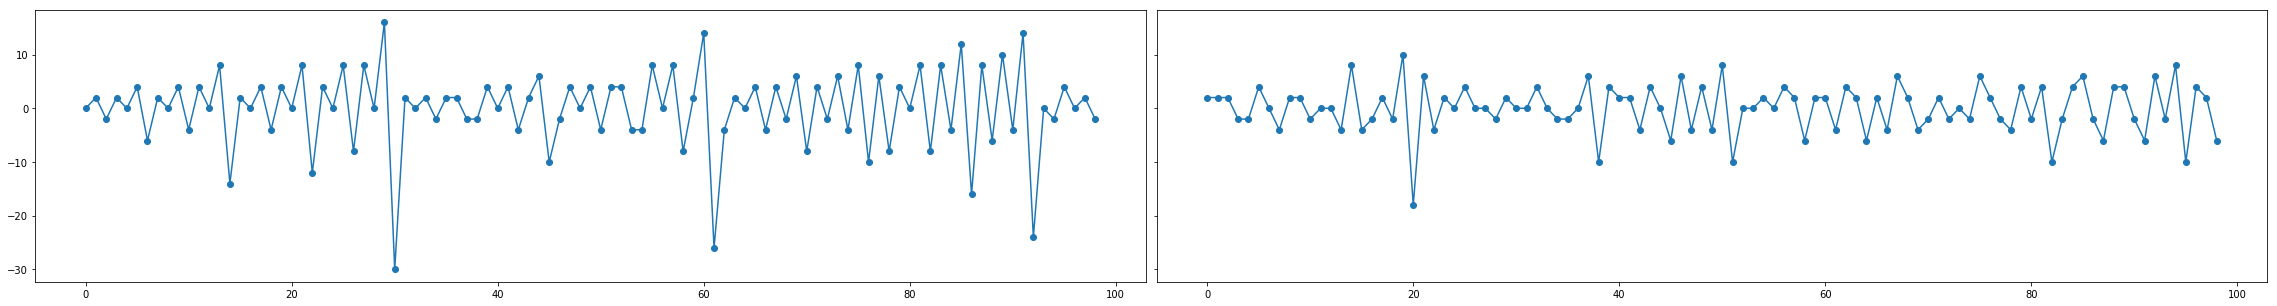

In [107]:
space_size = 35
step_size = 100
init_type_list = [1, 2]
fn_figure1 = './figures/fig_financial_ca.png'
fn_figure2 = './figures/fig_financial_price.png'

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
raw_data_list = []
for i, init_type in enumerate(init_type_list):
    results = exec_fs(space_size, init_type, step_size)
    axes[i].imshow(results, cmap='gray')
    raw_data_list.append(results)
plt.savefig(fn_figure1)

fig, axes = plt.subplots(1, 2, figsize=(40, 5), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
for i, results in enumerate(raw_data_list):
    ts_sum = (1-results).sum(axis=1)
    running_diff = ts_sum[1:] - ts_sum[:-1]
    axes[i].plot(running_diff, 'o-')

plt.savefig(fn_figure2)

# Financial System2

In [130]:
def init_state(init_type, space_size):
    if init_type == 1:
        # 中央の１ピクセルのみ１、後は０
        state = np.zeros(space_size, dtype=np.int8)
        state[space_size // 2] = 1
    elif init_type == 2:
        np.random.seed(0)
        state = np.random.randint(2, size=space_size)
    next_state = np.empty(space_size, dtype=np.int8)
    return state, next_state


def exec_fs(space_size=600, init_type=1, step_size=1000):
    state, next_state = init_state(init_type, space_size)

    results = []
    for _ in range(step_size):
        for i in range(space_size):
            l = state[i - 1]
            r = state[(i+1) % space_size]

            if (l + r) == 1:
                next_state[i] = 1
            else:
                next_state[i] = 0
        state = next_state.copy()
        results.append(1 - state)
    return np.array(results)

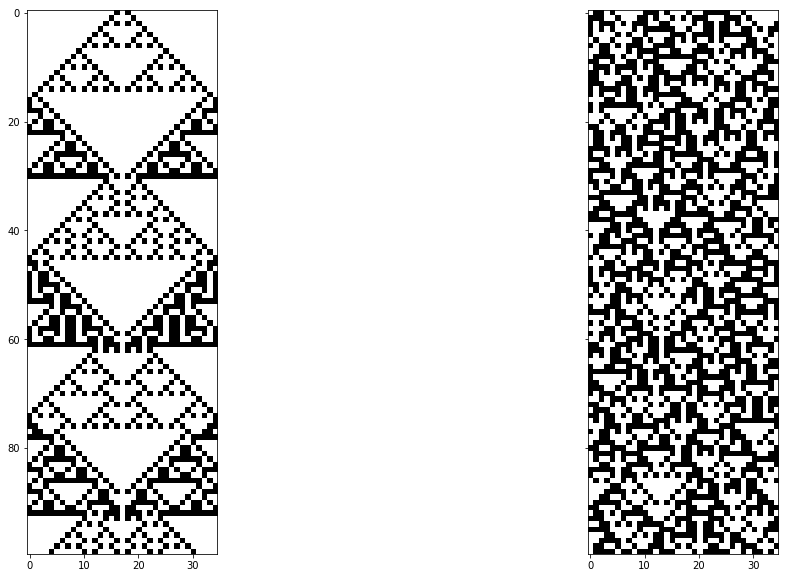

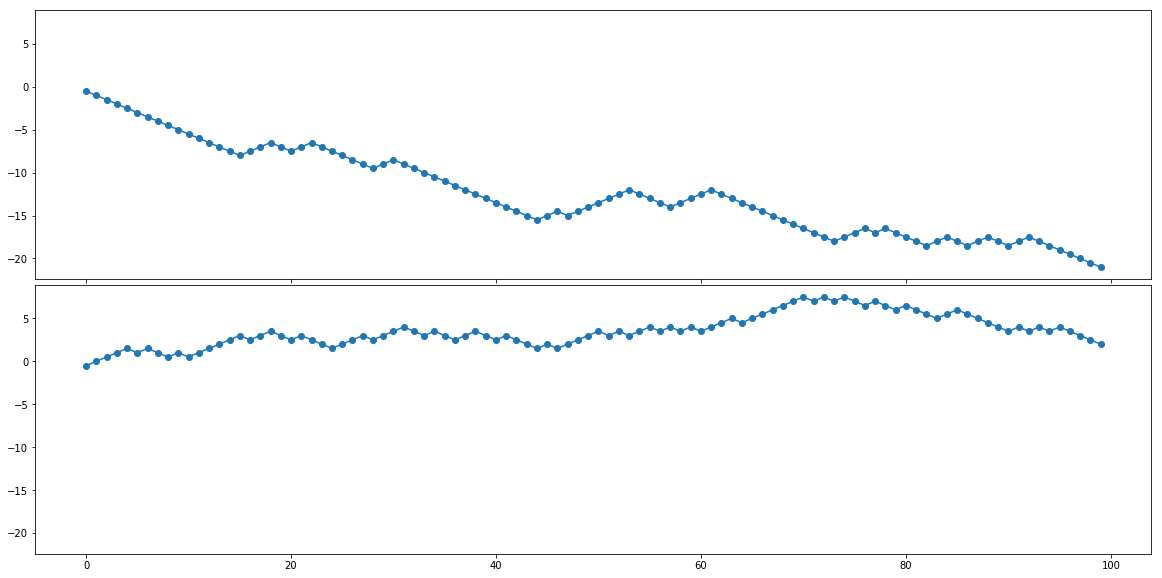

In [134]:
space_size = 35
step_size = 100
init_type_list = [1, 2]

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
raw_data_list = []
for i, init_type in enumerate(init_type_list):
    results = exec_fs(space_size, init_type, step_size)
    axes[i].imshow(results, cmap='gray')
    raw_data_list.append(results)

fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
for i, results in enumerate(raw_data_list):
    ts_sum = (0.5-results).cumsum(axis=0)
    axes[i].plot(ts_sum[:, 0], 'o-')

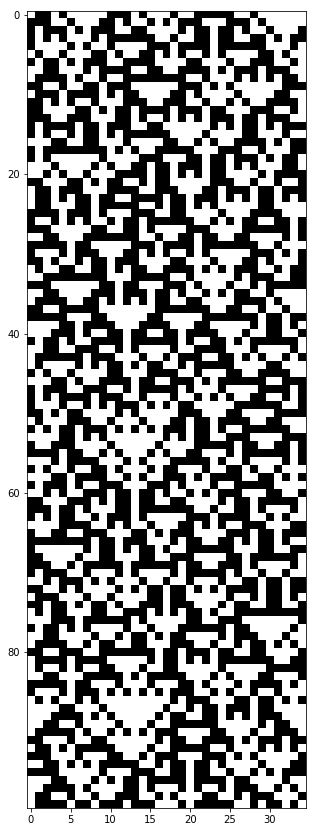

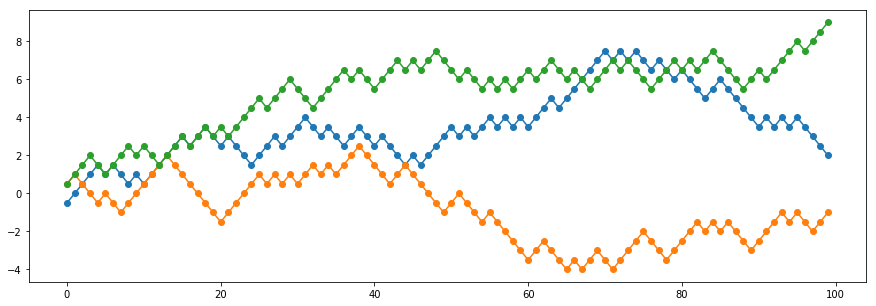

In [137]:
space_size = 35
step_size = 100
init_type = 2
fn_figure1 = './figures/fig_financial2_ca.png'
fn_figure2 = './figures/fig_financial2_price.png'

results = exec_fs(space_size, init_type, step_size)
ts = (0.5-results).cumsum(axis=0)

fig, ax = plt.subplots(1, 1, figsize=(5, 15), sharex=True, sharey=True)
ax.imshow(results, cmap='gray')
plt.savefig(fn_figure1)

fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.02)
for i in range(3):
    ax.plot(ts[:, i], 'o-')
plt.savefig(fn_figure2)